<a href="https://colab.research.google.com/github/krishdahake/Green-AI-Workshop/blob/main/16_Jan_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

^C


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML/ec_data.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [ ]:
print(data.isnull().sum())

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64


In [ ]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 90987.6875 - mae: 272.9258 - val_loss: 83565.7344 - val_mae: 258.7625
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93113.9219 - mae: 277.6066 - val_loss: 82951.7344 - val_mae: 257.5665
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90141.5625 - mae: 271.3841 - val_loss: 81931.8281 - val_mae: 255.5647
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85353.4609 - mae: 263.4496 - val_loss: 80281.4844 - val_mae: 252.2900
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83709.3281 - mae: 259.3221 - val_loss: 77851.3281 - val_mae: 247.3867
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88229.5156 - mae: 267.3294 - val_loss: 74460.5547 - val_mae: 240.3618
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78234.0625 - mae: 248.1392 - val_loss: 70074.3125 - val_mae: 230.9476
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73911.0469 - mae: 239.7206 - val_loss: 64581.

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18059.6035 - mae: 115.6737  
Test Mean Absolute Error: 116.16


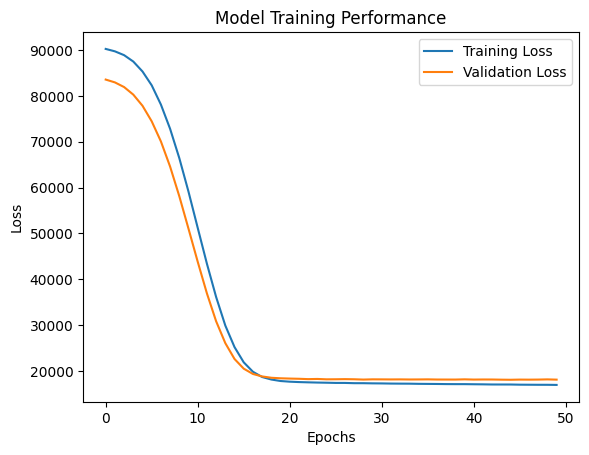

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[285.18237],
       [251.49239],
       [257.01355],
       [209.68571],
       [321.3507 ],
       [309.32706],
       [320.32208],
       [284.86154],
       [291.8968 ],
       [280.4101 ],
       [242.07146],
       [264.1077 ],
       [285.88867],
       [235.79172],
       [293.35748],
       [316.65234],
       [266.09982],
       [312.31302],
       [301.58896],
       [246.08116],
       [273.615  ],
       [279.6708 ],
       [262.6337 ],
       [262.15732],
       [248.65796],
       [242.2299 ],
       [259.38724],
       [316.40833],
       [314.74597],
       [265.03592],
       [234.28195],
       [307.28918],
       [291.37668],
       [278.19025],
       [307.78217],
       [292.7181 ],
       [217.33089],
       [253.5306 ],
       [286.16632],
       [239.28261],
       [246.27393],
       [251.35057],
       [248.82655],
       [266.644  ],
       [265.15387],
       [250.29442],
       [264.54532],
       [254.46725],
       [292.3824 ],
       [298.72015],


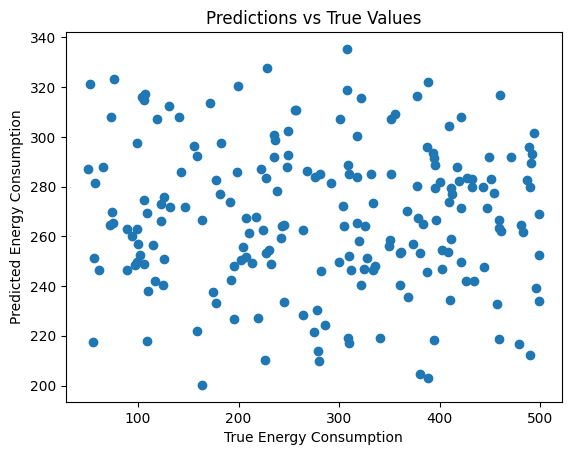

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_dim=4))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.8)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 81184.0469 - mae: 259.9484 - val_loss: 89908.6406 - val_mae: 269.8044
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75824.6484 - mae: 249.7872 - val_loss: 79144.7969 - val_mae: 249.0175
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56043.2148 - mae: 206.9819 - val_loss: 40826.8438 - val_mae: 165.0080
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25161.6934 - mae: 129.6013 - val_loss: 23280.5332 - val_mae: 128.3362
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19341.9180 - mae: 118.3197 - val_loss: 21781.1348 - val_mae: 122.4660
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15788.4551 - mae: 100.5697 - val_loss: 21777.4570 - val_mae: 122.4882
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14935.0713 - mae: 102.7942 - val_loss: 19421.3125 - val_mae: 118.7335
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15498.4189 - mae: 107.3327 - val_loss:

In [ ]:
test_loss, test_mae = model1.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20420.3965 - mae: 121.8544 
Test Mean Absolute Error: 120.38
